In [1]:
import numpy as np
import cmath
from matplotlib import pyplot
%matplotlib inline
def Zhuk(z, c = 1):
    return z + (c**2)/z

In [2]:
import cmath
a = 3
b = 3
z = a + b * 1j
print('z = ', z)
print('The type of the variable is ', type(z))
print('e^z = ', cmath.exp(z))

z =  (3+3j)
The type of the variable is  <class 'complex'>
e^z =  (-19.884530844146987+2.834471132487004j)


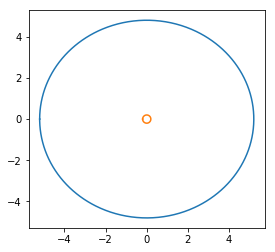

In [3]:
import numpy as np
import cmath
pyplot.axes(aspect='equal')
# for z in np.linspace(0,2j * cmath.pi,1000):
#     print ('dot = ', z)
#     print ('orig = ', cmath.e**z)
#     print ('res = ', Zhuk(cmath.e**z, 1))
#     size = 10
pyplot.plot(Zhuk((-0.2)*cmath.e**np.linspace(0,2j * cmath.pi,1000), 1).real, Zhuk((-0.2)*cmath.e**np.linspace(0,2j * cmath.pi,1000), 1).imag);
pyplot.plot(((-0.2)*cmath.e**np.linspace(0,2j * cmath.pi,1000)).real, ((-0.2)*cmath.e**np.linspace(0,2j * cmath.pi,1000)).imag);

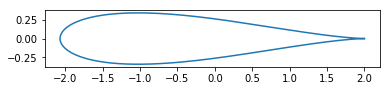

In [4]:
import numpy as np
from matplotlib import pyplot

fi = np.linspace(0, 2*np.pi, 1000)
r = 1.15
a = r*np.cos(fi) - 0.15
b = r*np.sin(fi) 
z = a + b * 1j
pyplot.axes(aspect='equal')
pyplot.plot(Zhuk(z).real,Zhuk(z).imag);

In [5]:
fi_start, fi_end = 0, np.pi*2
r_start, r_end = 1.15, 5
r = np.linspace(r_start, r_end, 100)
fi = np.linspace(fi_start, fi_end, 145)

R, Fi = np.meshgrid(r, fi)
X = R*np.cos(Fi) - 0.15
Y = R*np.sin(Fi)
Z = X + Y*1j



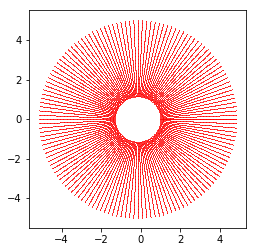

In [6]:
pyplot.axes(aspect='equal')
pyplot.scatter(X, Y, s=1, color='red', marker='o', linewidth=0);

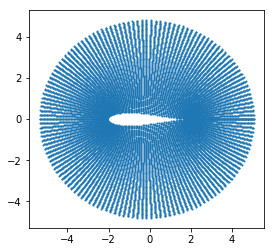

In [7]:
pyplot.axes(aspect='equal')
pyplot.scatter(Zhuk(Z).real,Zhuk(Z).imag, s=1);

In [8]:
def get_velocity(strength, xs, ys, X, Y):
    
    u = strength/(2*np.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*np.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u, v
def get_velocity_doublet(strength, xd, yd, X, Y):
    u = - strength/(2*np.pi)*((X-xd)**2-(Y-yd)**2)/\
    ((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*np.pi)*2*(X-xd)*(Y-yd)/\
    ((X-xd)**2+(Y-yd)**2)**2
    
    return u, v
def get_stream_doublet(strength, xd, yd, X, Y):
    psi = - strength/(2*np.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    
    return psi

In [9]:
u_inf = 1

x_doublet, y_doublet = -0.15, 0.0
kappa = 2*np.pi*1.15**2

u_freestream = u_inf * np.ones((145, 100), dtype=float)
v_freestream = np.zeros((145, 100), dtype=float)

psi_freestream = u_inf * Y


psi_doublet = get_stream_doublet(kappa, x_doublet, y_doublet, X, Y)

psi = psi_freestream + psi_doublet

u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)

u = u_freestream + u_doublet
v = v_freestream + v_doublet

Ksi = Zhuk(X+Y*1j)

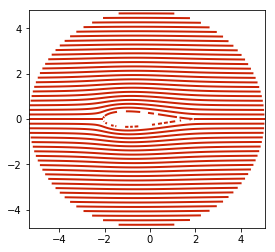

In [10]:
pyplot.axes(aspect='equal')
pyplot.contour(Ksi.real, Ksi.imag, psi, 51, colors='#CD2305', linewidths=2, linestyles='solid');

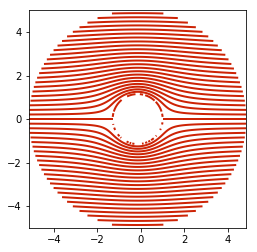

In [11]:
pyplot.axes(aspect='equal')
pyplot.contour(X, Y, psi, 51, colors='#CD2305', linewidths=2, linestyles='solid');

In [12]:
W =(u - v*1j)/(1-1/Z**2)

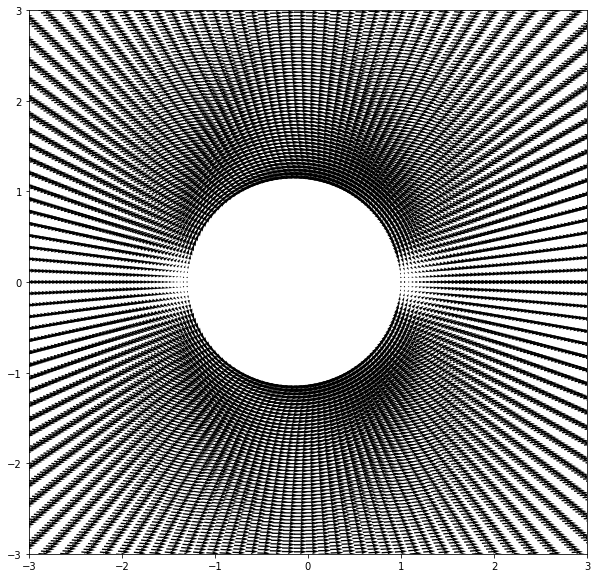

In [13]:
pyplot.figure(figsize=(10,10))

pyplot.xlim(-3, 3)
pyplot.ylim(-3, 3)

pyplot.quiver(X,Y, u, v, scale=50);

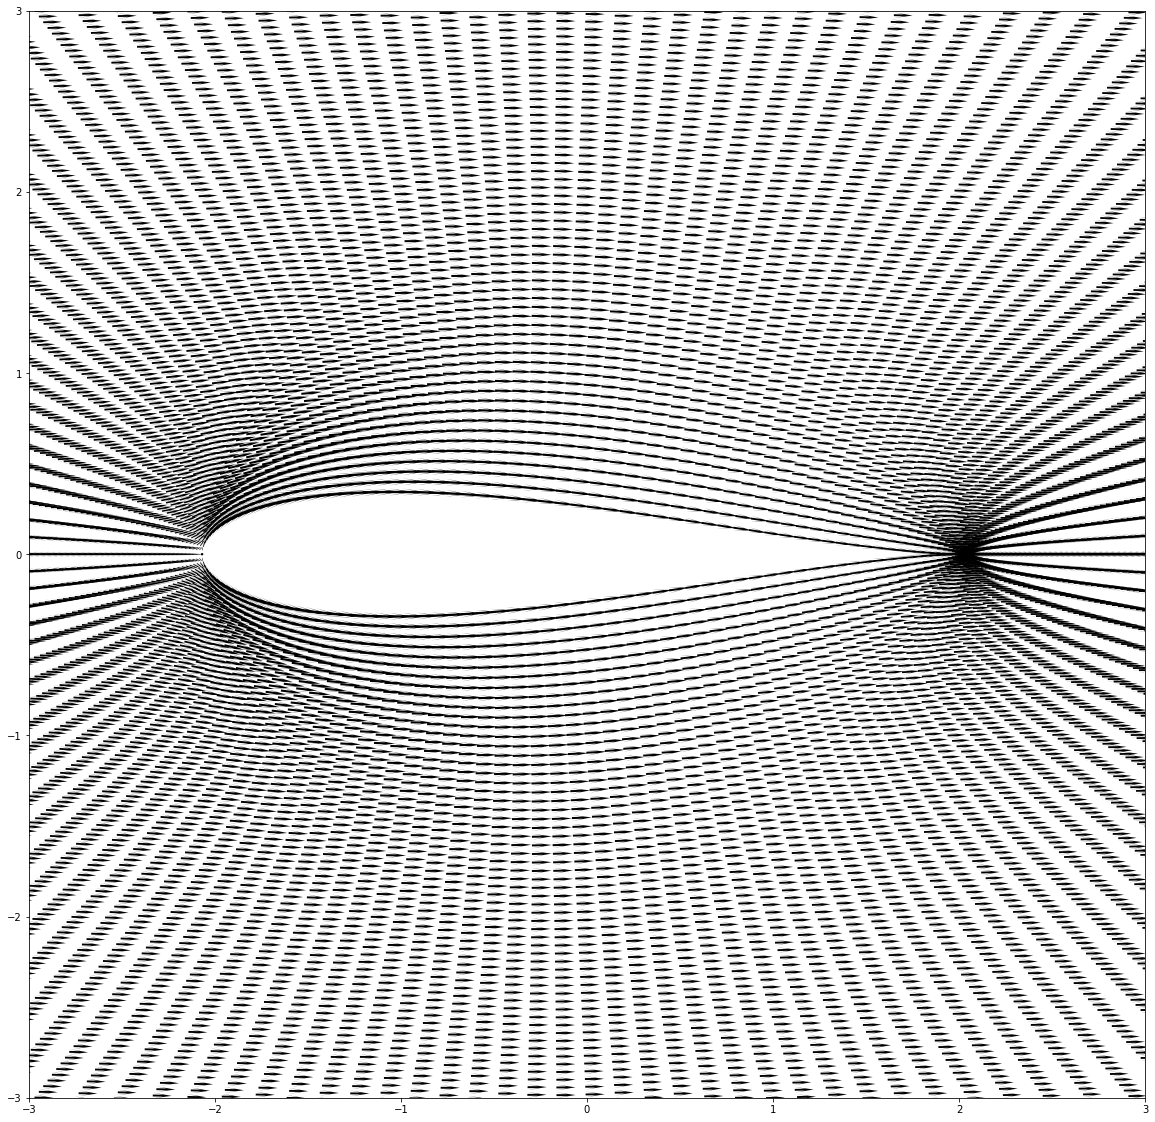

In [14]:
pyplot.figure(figsize=(20,20))

pyplot.xlim(-3, 3)
pyplot.ylim(-3, 3)

pyplot.quiver(Ksi.real,Ksi.imag, W.real, -W.imag, scale=60, headlength = 10);

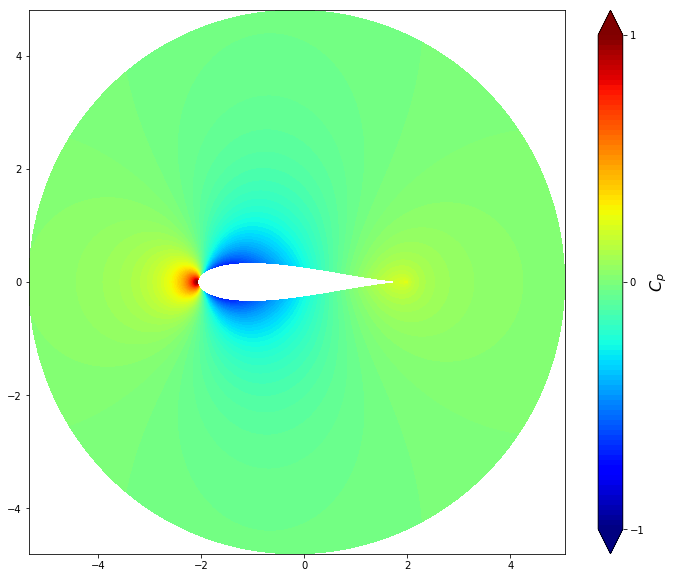

In [15]:
cp = 1.0 - (W.real**2+W.imag**2)/u_inf**2
pyplot.figure(figsize=(12,10))

contf = pyplot.contourf(Ksi.real,Ksi.imag, cp, levels=np.linspace(-1.0, 1.0, 100),\
                        extend='both', cmap='jet')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-1.0, 0.0, 1.0])

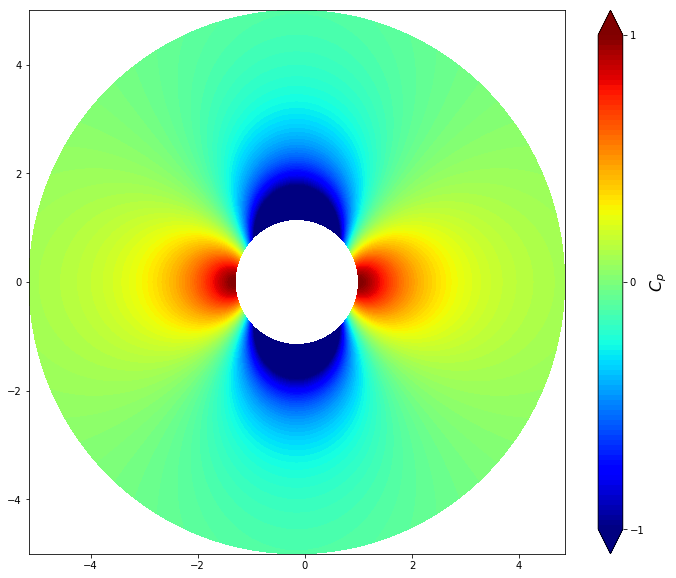

In [16]:
cp = 1.0 - (u**2+v**2)/u_inf**2
pyplot.figure(figsize=(12,10))

contf = pyplot.contourf(X,Y, cp, levels=np.linspace(-1.0, 1.0, 100),\
                        extend='both', cmap='jet')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-1.0, 0.0, 1.0])

In [17]:
fi = -20*np.pi/180
nX = (X + 0.15) * np.cos(fi) + Y * np.sin(fi) - 0.15
nY = -(X + 0.15) * np.sin(fi) + Y * np.cos(fi)

nZ = nX + 1j * nY

nKsi = Zhuk(nX+nY*1j)
# nXc = (Ksi.real - Zhuk(0.15).real) * np.cos(fi) + Ksi.imag * np.sin(fi)
# nYc = -(Ksi.real - Zhuk(0.15).real) * np.sin(fi) + Ksi.imag * np.cos(fi)

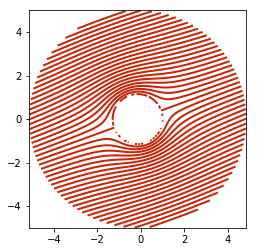

In [18]:
pyplot.axes(aspect='equal')
pyplot.contour(nX, nY, psi, 51, colors='#CD2305', linewidths=2, linestyles='solid');

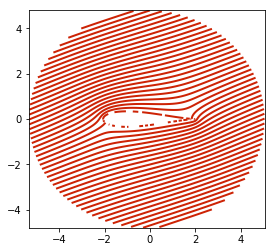

In [19]:
pyplot.axes(aspect='equal')
pyplot.contour(nKsi.real, nKsi.imag, psi, 51, colors='#CD2305', linewidths=2, linestyles='solid');
# pyplot.contour(nXc, nYc, psi, 51, colors='#CD2305', linewidths=2, linestyles='solid');

In [20]:
nWu = (u - 1j*v) * np.e**(1j*fi)
nW = (nWu)/(1-1/nZ**2)

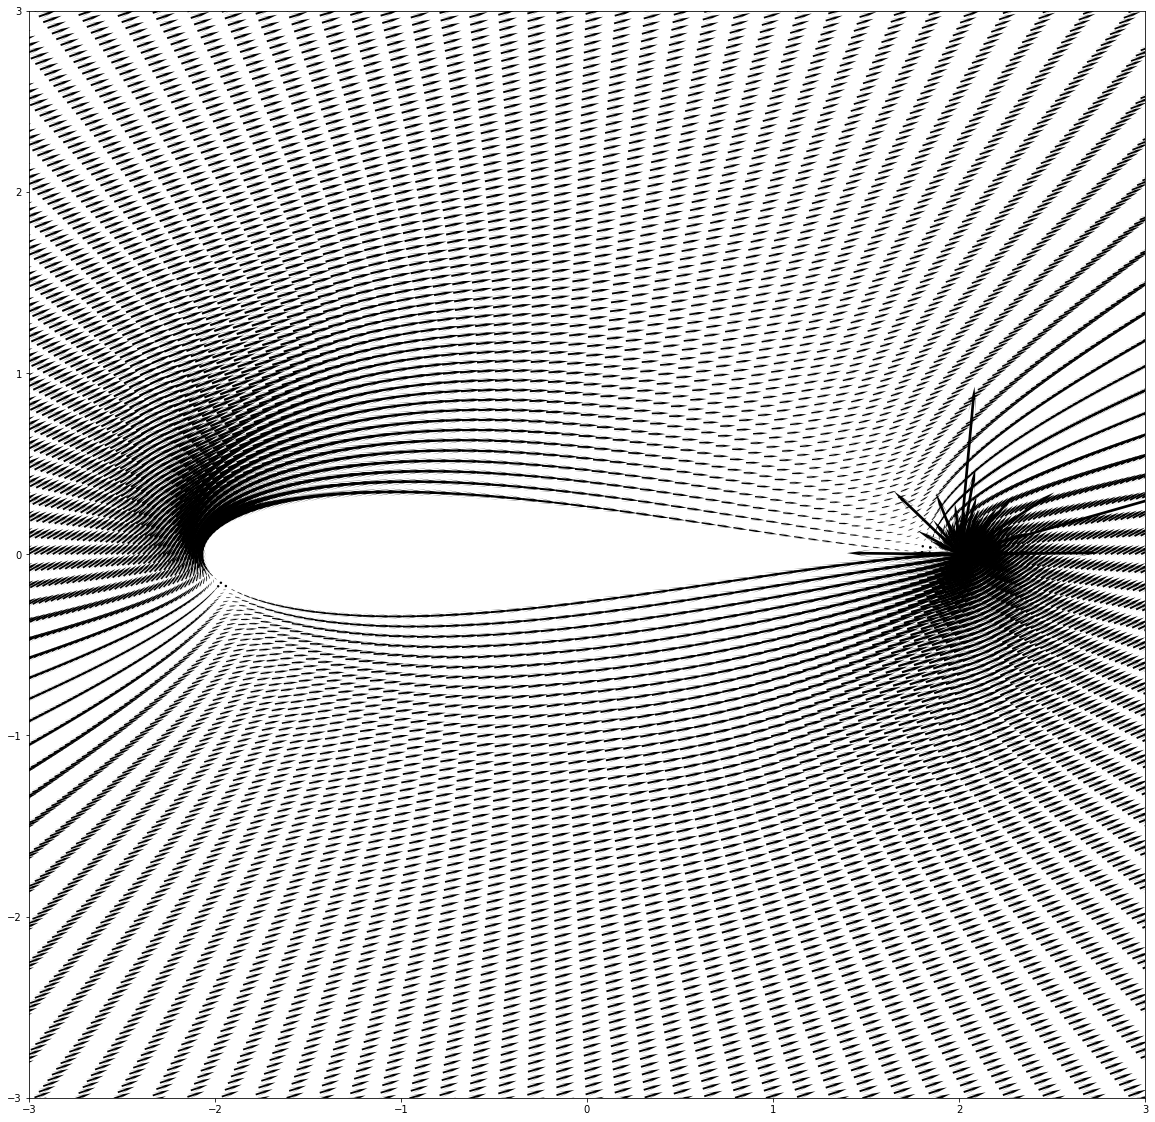

In [21]:
pyplot.figure(figsize=(20,20))

pyplot.xlim(-3, 3)
pyplot.ylim(-3, 3)

pyplot.quiver(nKsi.real,nKsi.imag, nW.real, -nW.imag, scale=60, headlength = 10);

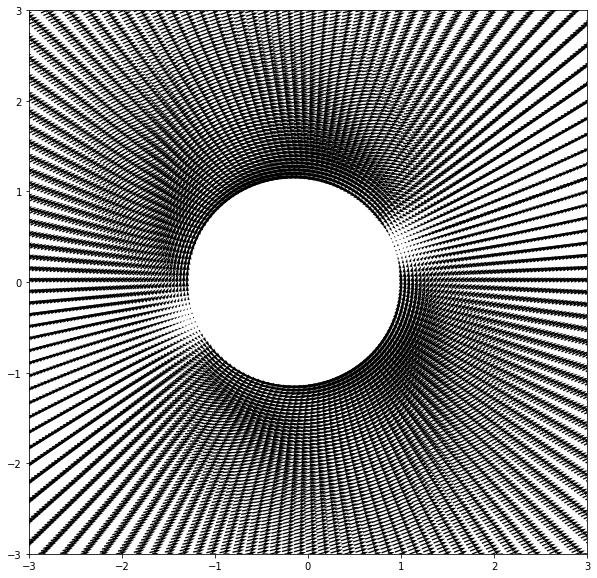

In [22]:
pyplot.figure(figsize=(10,10))

pyplot.xlim(-3, 3)
pyplot.ylim(-3, 3)

pyplot.quiver(nX,nY, nWu.real, -nWu.imag, scale=50);

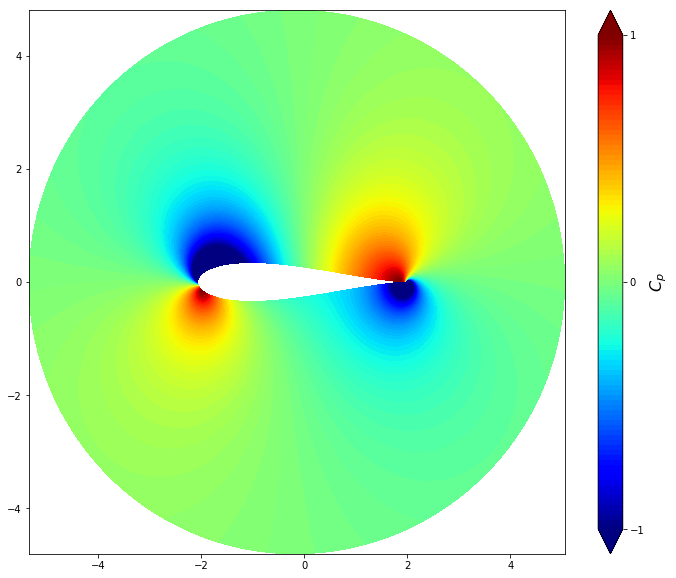

In [23]:
ncp = 1.0 - (nW.real**2+nW.imag**2)/u_inf**2
pyplot.figure(figsize=(12,10))

contf = pyplot.contourf(nKsi.real,nKsi.imag, ncp, levels=np.linspace(-1.0, 1.0, 100),\
                        extend='both', cmap='jet')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-1.0, 0.0, 1.0])

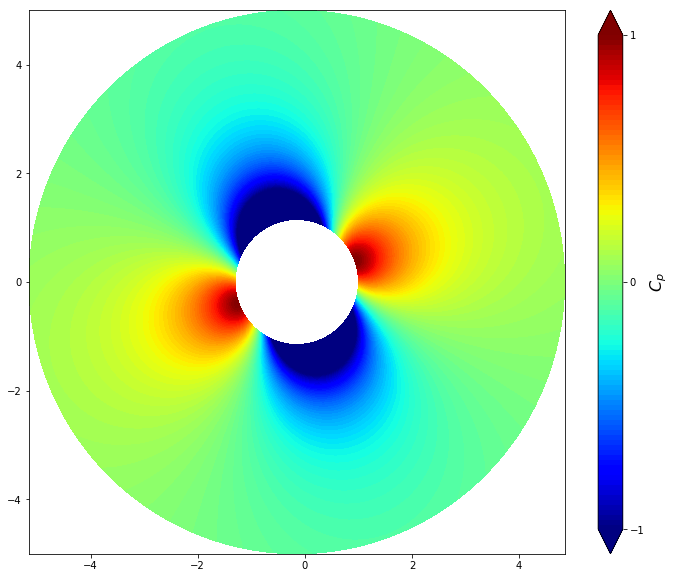

In [24]:
ncp = 1.0 - (nWu.real**2+nWu.imag**2)/u_inf**2
pyplot.figure(figsize=(12,10))

contf = pyplot.contourf(nX,nY, ncp, levels=np.linspace(-1.0, 1.0, 100),\
                        extend='both', cmap='jet')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-1.0, 0.0, 1.0])

In [25]:
gamma = -np.sin(fi)*4*np.pi*1.15

In [26]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = + strength/(2*np.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*np.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    return u, v

def get_stream_function_vortex(strength, xv, yv, X, Y):
    """
    Returns the stream-function generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength/(4*np.pi)*np.log((X-xv)**2+(Y-yv)**2)
    
    return psi

In [27]:
u_vortex, v_vortex = get_velocity_vortex(gamma, -0.15, 0, nX, nY)
psi_vortex = get_stream_function_vortex(gamma, -0.15, 0, nX, nY)

In [28]:
nu_vu = nWu.real + u_vortex
nv_vu = - nWu.imag + v_vortex
psi_v = psi + psi_vortex

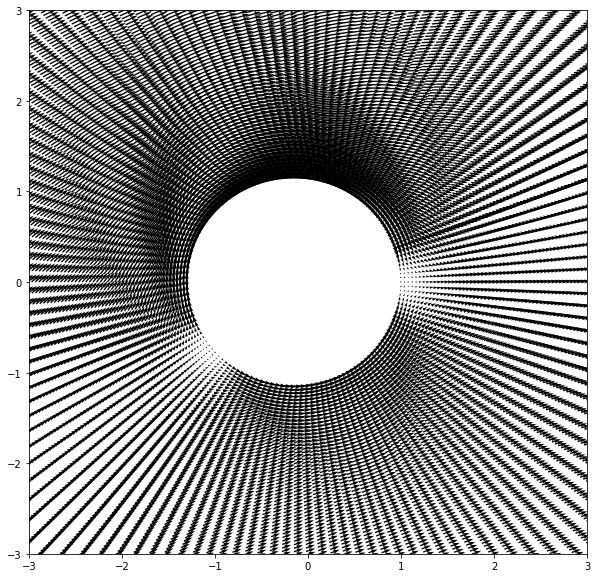

In [29]:
pyplot.figure(figsize=(10,10))

pyplot.xlim(-3, 3)
pyplot.ylim(-3, 3)

pyplot.quiver(nX,nY, nu_vu, nv_vu, scale=50);

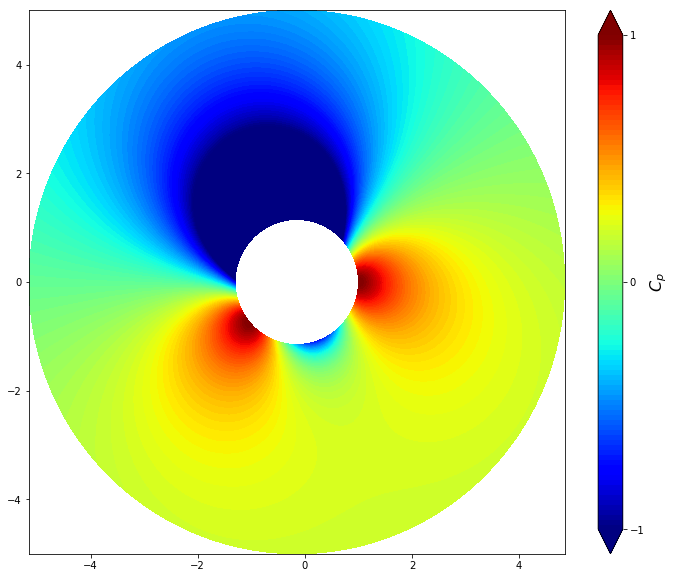

In [30]:
ncp_v = 1.0 - (nu_vu**2+nv_vu**2)/u_inf**2
pyplot.figure(figsize=(12,10))

contf = pyplot.contourf(nX,nY, ncp_v, levels=np.linspace(-1.0, 1.0, 100),\
                        extend='both', cmap='jet')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-1.0, 0.0, 1.0])

In [31]:
nW_v = (nu_vu - 1j * nv_vu)/(1-1/nZ**2)

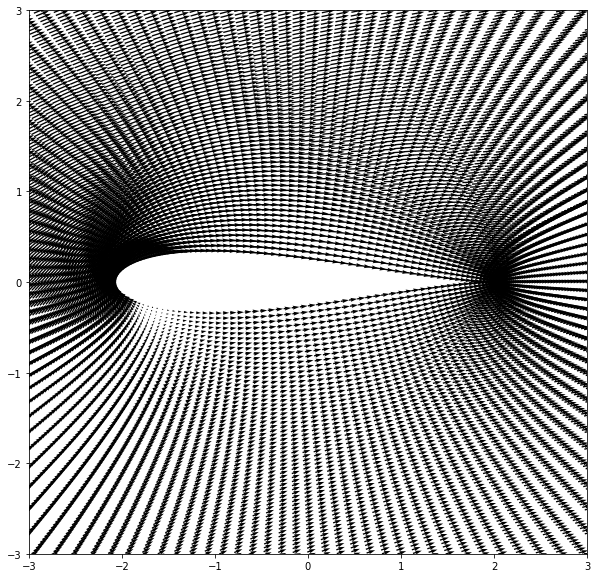

In [32]:
pyplot.figure(figsize=(10,10))

pyplot.xlim(-3, 3)
pyplot.ylim(-3, 3)

pyplot.quiver(nKsi.real,nKsi.imag, nW_v.real, -nW_v.imag, scale=50);

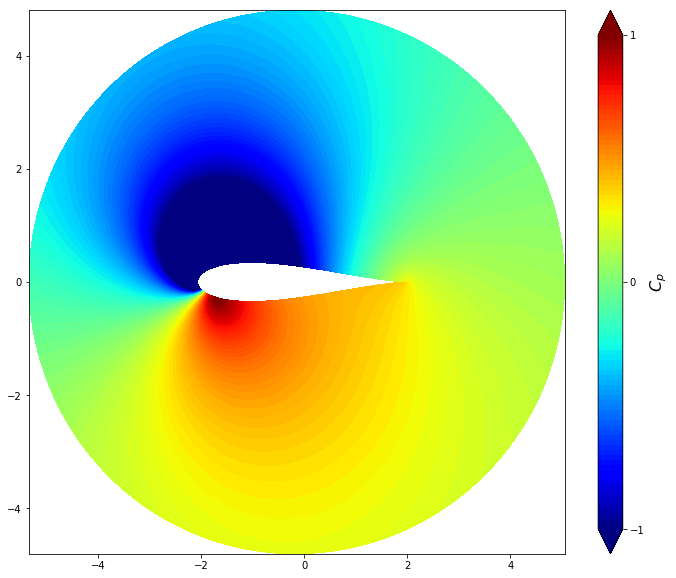

In [33]:
ncp_v_p = 1.0 - (nW_v.real**2+nW_v.imag**2)/u_inf**2
pyplot.figure(figsize=(12,10))

contf = pyplot.contourf(nKsi.real,nKsi.imag, ncp_v_p, levels=np.linspace(-1.0, 1.0, 100),\
                        extend='both', cmap='jet')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-1.0, 0.0, 1.0])

NameError: name 'dots_X' is not defined

In [36]:
#print(ncp_v_p[:,0])
fi_s = np.linspace(0, 2 * np.pi, 145)
F_x = 0
F_y = 0
print(fi)
for i in range (0, 145 // 2 + 1):
    F_y += (nKsi.real[i + 1][0] - nKsi.real[i][0]) * (ncp_v_p[i][0] + ncp_v_p[i + 1][0] - ncp_v_p[-i][0] - ncp_v_p[- i - 1][0]) / 2
    F_x += (nKsi.imag[i + 1][0] - nKsi.imag[i][0]) * (ncp_v_p[i][0] + ncp_v_p[i + 1][0] + ncp_v_p[-i][0] + ncp_v_p[- i - 1][0]) / 2
print('F_x = ', (F_x * np.cos(fi) + F_y * np.sin(fi))/2)
print('F_y = ', (-F_x * np.sin(fi) + F_y * np.cos(fi))/2)

-0.3490658503988659
F_x =  -0.03533022403094854
F_y =  4.629945378872141
